<a href="https://colab.research.google.com/github/YonseiESC/ESC20-SPRING/blob/master/%EA%B3%BC%EC%A0%9C%20%EC%A0%9C%EC%B6%9C/week3/6%EC%A1%B0/Week3_HW_%EC%9D%B4%EC%9E%AC%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3:CH04 LINEAR METHODS FOR CLASSIFICATION

6조 이재상


## HW1. Multinomial Naive Bayes Classifier 예시 해보기

feature가 서로 독립이며 단순히 다항분포를 따른다고 가정할 떄 쓰기 좋다. 대표적인 예로 feature가 어떤 count, 횟수일 때 쓰는데, 텍스트 분류에서 자주 쓰인다고 한다. 자세한 예시와 코드는 https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html 여기에서 Multinomial Naive Bayes 항목을 참고하자. 짧은 토막글을 내부 단어에 따라 분류하는 예시를 소개하는데, 한 번 따라해보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

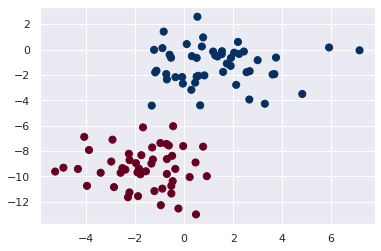

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

[(-15.0, 5.0), (-8.0, 8.0)]

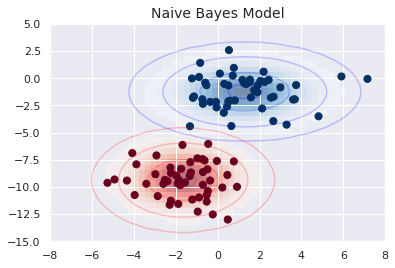

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)


In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [0]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

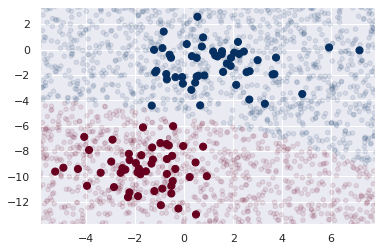

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Multinomial Naive Bayes



In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [0]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

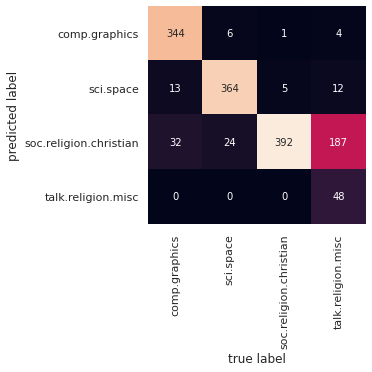

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [15]:
predict_category('sending a payload to the ISS')

'sci.space'

In [16]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [17]:
predict_category('determining the screen resolution')

'comp.graphics'

## HW2. 둘 중 하나를 선택.

**선택 1** <br>
아래 링크로 가서 와인의 특성에 따라 와인의 재배종을 분류하는 데이터를 다운<br>
https://www.kaggle.com/brynja/wineuci

1. 데이터 전처리 및 시각화
    1. 데이터 분포를 보고
    1. 결측치 없나 확인하고
    1. feature 결정하고
1. Train-Test set split하기
1. Test에 다음의 모델을 fit해보기
    1. LDA / GDA
    1. Logistic Regression
    1. Logistic Regression with feature expansion (kcv로 차수결정)
1. 각 모델에 대해 Test MSE 보고하고 결과 해석하기

**선택 2** <br>
Multinomial Naive Bayes Classifier로 본인이 직접 인터넷에서 텍스트 데이터를 찾아서 분류해보기. 캐글같은데 뒤지면 머 하나 나올듯?

둘 중 재밌어보이는 것을 선택해서 제출해주세요!

### 1. EDA

#### 1) Import Data / EDA


In [0]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Importing the dataset
 from google.colab import files

uploaded = files.upload()


Saving Wine.csv to Wine.csv


In [20]:
wine = pd.read_csv('Wine.csv')
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


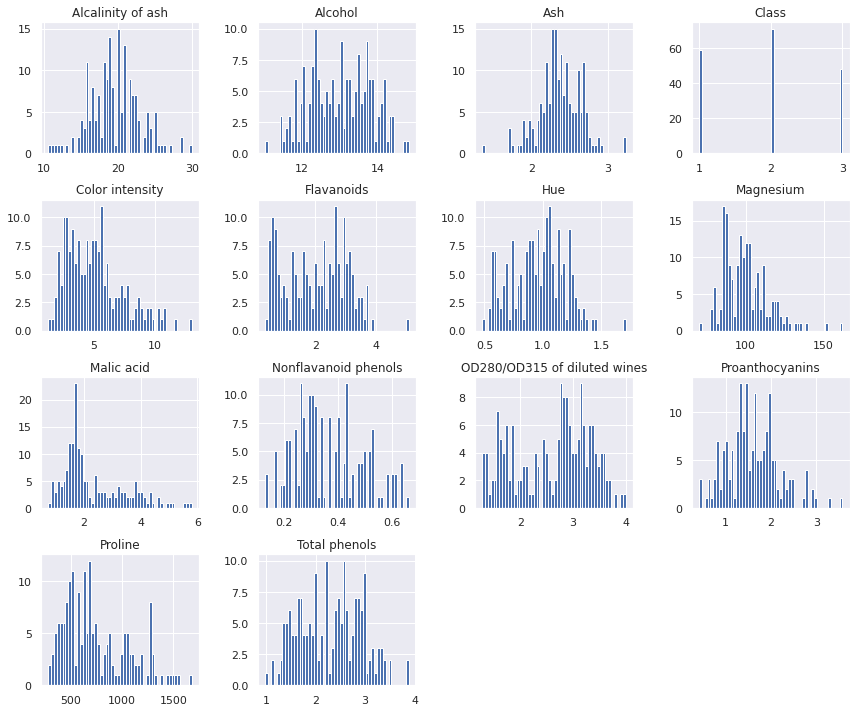

In [22]:
wine.hist(bins=50, figsize=(12,10))
plt.tight_layout()

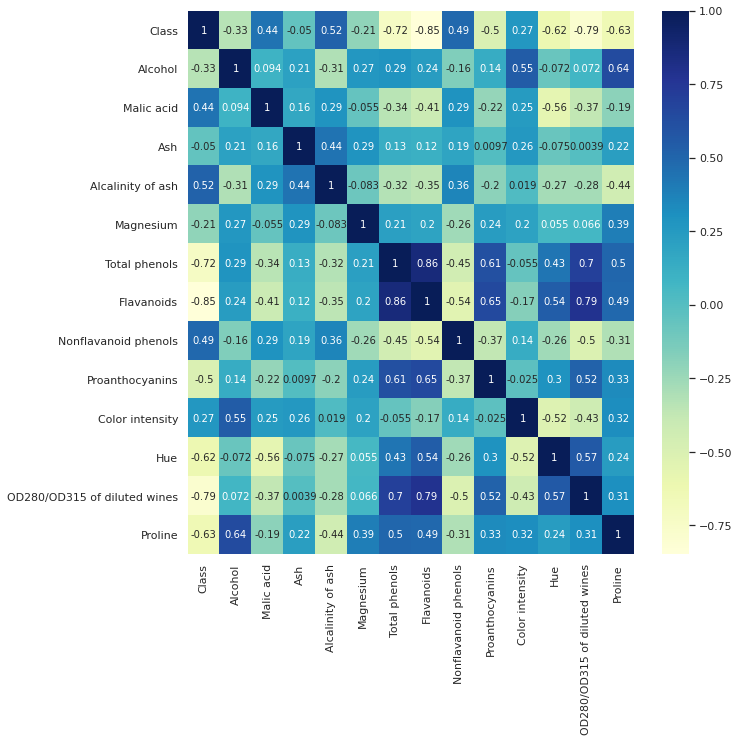

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = wine[wine.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)


#### 2) Missing Data

In [24]:
wine.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

#### 3) Feature Selection

Feature importances from tree-based models

[Feature Selection 참고 사이트](https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b)


In [0]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [26]:
Y = wine['Class']
X = wine[wine.columns[1:]]

feat_names = wine.columns[1:]
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))



Features sorted by their score:
[(0.4705, 'Flavanoids'), (0.2346, 'Proline'), (0.1369, 'OD280/OD315 of diluted wines'), (0.0906, 'Color intensity'), (0.037, 'Alcohol'), (0.0144, 'Hue'), (0.006, 'Magnesium'), (0.0028, 'Alcalinity of ash'), (0.0027, 'Ash'), (0.0026, 'Malic acid'), (0.0009, 'Proanthocyanins'), (0.0006, 'Nonflavanoid phenols'), (0.0004, 'Total phenols')]


tree-based model을 통한 feature importance 결과를 토대로 중요도가 높은 3개의 변수를 채택하기로 했다. 

채택한 변수 : ('Flavanoids', 'Proline', 'OD280/OD315 of diluted wines')

In [27]:
wine['Flavanoids'].describe()


count    178.000
mean       2.029
std        0.999
min        0.340
25%        1.205
50%        2.135
75%        2.875
max        5.080
Name: Flavanoids, dtype: float64

In [28]:
wine['Proline'].describe()

count     178.000
mean      746.893
std       314.907
min       278.000
25%       500.500
50%       673.500
75%       985.000
max      1680.000
Name: Proline, dtype: float64

In [29]:
 wine['OD280/OD315 of diluted wines'].describe()

count    178.000
mean       2.612
std        0.710
min        1.270
25%        1.938
50%        2.780
75%        3.170
max        4.000
Name: OD280/OD315 of diluted wines, dtype: float64

In [30]:
import plotly.express as px
fig = px.scatter_3d(wine, x='Flavanoids', y='Proline', z='OD280/OD315 of diluted wines',
                   color='Class')
fig.update_traces(marker=dict(size=6,
                              line=dict(width=2,color='DarkSlateGrey')))
fig.show()

In [0]:
ht = np.linspace(250, 1700, 500)

### 2. Train-Test set split

In [32]:
#use sklearn
from sklearn.model_selection import train_test_split
X = wine[['Flavanoids',  'Proline','OD280/OD315 of diluted wines']]
Y = wine['Class']

np.random.seed(123)
# train : test = 7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)
print(X_train.shape, X_test.shape)


(124, 3) (54, 3)


### 3. Model fitting

#### 1)LDA / QDA

In [0]:
# Rearrange Training data set for LDA fitting
X_train_input = np.vstack((X_train['Flavanoids'],X_train['Proline'], X_train['OD280/OD315 of diluted wines'])).T  ## Transpose
Y_train_input = np.hstack(Y_train)
X_test_input = np.vstack((X_test['Flavanoids'], X_test['Proline'],X_test['OD280/OD315 of diluted wines'])).T  ## Transpose
Y_test_input = np.hstack(Y_test)

In [35]:
# Call LDA function from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis().fit(X_train_input,Y_train_input)


print('LDA train Score: ', clf_LDA.score(X_train_input,Y_train_input))
print('LDA test Score: ', clf_LDA.score(X_test_input,Y_test_input))
LDA_score = clf_LDA.score(X_test_input,Y_test_input)

LDA train Score:  0.9274193548387096
LDA test Score:  0.9444444444444444


In [36]:
## Call QDA function from sklearn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis().fit(X_train_input,Y_train_input)

print('QDA train Score: ', clf_QDA.score(X_train_input,Y_train_input))
print('QDA test Score: ', clf_QDA.score(X_test_input,Y_test_input))
QDA_score = clf_QDA.score(X_test_input,Y_test_input)

QDA train Score:  0.9274193548387096
QDA test Score:  0.9444444444444444


#### 2) Logistic Regression

In [37]:
# Logistic Regression without Feature Extraction

from sklearn.linear_model import LogisticRegression
clf_log1 = LogisticRegression(solver='lbfgs',
                         max_iter=1000).fit(X_train_input, Y_train_input)

print('Logistic Regression train Score: ',clf_log1.score(X_train_input, Y_train_input)) 
print('Logistic Regression test Score: ',clf_log1.score(X_test_input, Y_test_input))
log_score = clf_log1.score(X_test_input, Y_test_input)

Logistic Regression train Score:  0.9274193548387096
Logistic Regression test Score:  0.9629629629629629


#### 3) Logistic Regression with feature expansion (by kcv)

In [42]:
## Logistic Regression with Feature Extraction: Poly
## kcv로 차수결정

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_train = np.zeros(0)     # MSE 저장용 array 생성
kcvMSE_test = np.zeros(0)


for i in np.arange(5):
    for train_index, test_index in kcv.split(X_train_input, Y_train_input):
        print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
        CV_X_train, CV_X_test = X_train_input[train_index,:], X_train_input[test_index,:]
        CV_Y_train, CV_Y_test = Y_train_input[train_index], Y_train_input[test_index]
    
        poly = PolynomialFeatures(degree=i+1, include_bias=False)
        poly_X_train = poly.fit_transform(CV_X_train)   # order : [X1 X2 X1^2 X1*X2 X2^2]
        plot_X_test = poly.fit_transform(CV_X_test)
        clf_log2 = LogisticRegression(max_iter=10000).fit(poly_X_train, CV_Y_train)
        kcvMSE_train = np.append(kcvMSE_train, clf_log2.score(poly_X_train, CV_Y_train))
        kcvMSE_test = np.append(kcvMSE_test,clf_log2.score(plot_X_test, CV_Y_test))

TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (100,) TEST: (24,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (100,) TEST: (24,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (100,) TEST: (24,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (100,) TEST: (24,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (99,) TEST: (25,)
TRAIN: (100,) TEST: (24,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940

In [0]:
kcvMSE_train = kcvMSE_train.reshape(5, 5)
kcvMSE_test = kcvMSE_test.reshape(5, 5)

In [44]:
## 평균으로 MSE값 계산하기
kcvMSE_train_mean = np.zeros((5, 1))
kcvMSE_test_mean = np.zeros((5,1))

for i in np.arange(5):
    kcvMSE_train_mean[i] = 1-np.mean(kcvMSE_train[i, :])
    kcvMSE_test_mean[i] = 1-np.mean(kcvMSE_test[i, :])

print(kcvMSE_train_mean)
print(kcvMSE_test_mean)

[[0.069]
 [0.069]
 [0.062]
 [0.515]
 [0.637]]
[[0.081]
 [0.081]
 [0.096]
 [0.553]
 [0.638]]


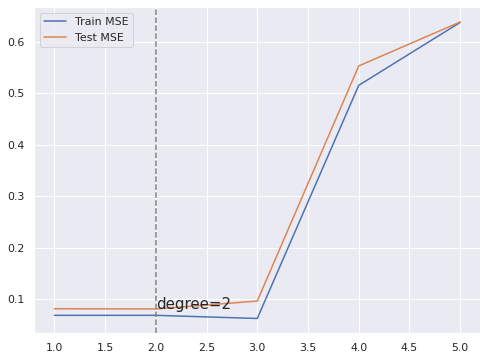

In [45]:
## Test, Train MSE 그려보기

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(np.arange(1, 6), kcvMSE_train_mean, label='Train MSE')
ax1.plot(np.arange(1, 6), kcvMSE_test_mean, label='Test MSE')
ax1.axvline(x=np.arange(1, 6)[np.argmin(kcvMSE_test_mean)], linestyle='--', color='grey')
ax1.text(np.arange(1, 6)[np.argmin(kcvMSE_test_mean)], np.amin(kcvMSE_test_mean), 'degree={0}'.format(np.argmin(kcvMSE_test_mean)+1), size=15)
ax1.legend()

In [47]:
## Logistic Regression with Feature Extraction: Polynomial with degree 1

poly = PolynomialFeatures(degree=1, include_bias=False) # No column of 1s
X_poly_train = poly.fit_transform(X_train_input)   # order : [X1 X2 X1^2 X1*X2 X2^2]
X_poly_test = poly.fit_transform(X_test_input)
clf_log2 = LogisticRegression(max_iter=10000).fit(X_poly_train, Y_train_input)
print('Logistic Regression(polynomial with degree 1) train Score: ',clf_log2.score(X_poly_train, Y_train_input)) 
print('Logistic Regression(polynomial with degree 1) test Score: ',clf_log2.score(X_poly_test, Y_test_input)) 
log2_score = clf_log2.score(X_poly_test, Y_test_input)

Logistic Regression(polynomial with degree 1) train Score:  0.9274193548387096
Logistic Regression(polynomial with degree 1) test Score:  0.9629629629629629


### 4. Test MSE

In [48]:
## Total MSE 비교
print("MSE of LDA :", LDA_score)
print("MSE of QDA :", QDA_score)
print("MSE of Logistic without Feature Extraction :", log_score)
print("MSE of Logistic with Feature Extraction :", log2_score)

MSE of LDA : 0.9444444444444444
MSE of QDA : 0.9444444444444444
MSE of Logistic without Feature Extraction : 0.9629629629629629
MSE of Logistic with Feature Extraction : 0.9629629629629629
